In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import os
import sys 
sys.path.append("../src")
from Fitness.Brookesia import Calculate_Brookesia


In [23]:
yaml = YAML()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D"
main_Path = os.getcwd()
flag_output = True

Brookesia = [species for species, values in data.items() if values["Brookesia"] == 1]


data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimA.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OptimB.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [24]:
Err_s_red,Err_T_red,Err_IDT_red = Calculate_Brookesia(data_d,data_r,data,main_Path,flag_output)
Err_s_red_A,Err_T_red_A ,Err_IDT_red_A= Calculate_Brookesia(data_d,data_o,data,main_Path,flag_output)
Err_s_red_B,Err_T_red_B,Err_IDT_red_B = Calculate_Brookesia(data_d,data_ob,data,main_Path,flag_output)

Err BROOKESIA mean =1.09E+01
Err BROOKESIA max =1.38E+00
Err BROOKESIA mean =1.83E+01
Err BROOKESIA max =1.48E+00
Err BROOKESIA mean =1.32E+01
Err BROOKESIA max =1.70E+00


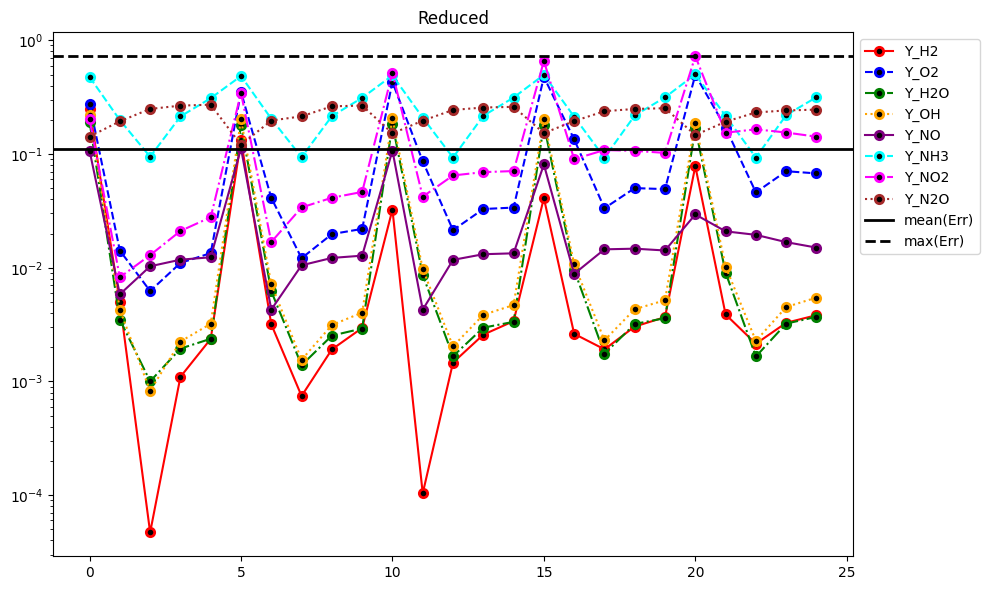

In [25]:
plt.figure(figsize=(10, 6))

# Define a list of line styles and markers to differentiate the curves
line_styles = ['-', '--', '-.', ':']  # Different line styles
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'lime', 'teal', 'gray']


for i in range(len(Brookesia)):
    plt.plot(np.array(Err_s_red)[:, i], label=f"{Brookesia[i]}", 
             linestyle=line_styles[i % len(line_styles)],  # Use different line styles
             color=colors[i],                            # Use distinct colors
             marker='o', markerfacecolor='black', markeredgewidth=2)  # Add markers

plt.axhline(y=np.mean(Err_s_red), color='black', linestyle='-', linewidth=2, label='mean(Err)')
plt.axhline(y=np.max(Err_s_red), color='black', linestyle='--', linewidth=2, label='max(Err)')
plt.yscale("log")
plt.title("Reduced")
# Add the legend outside the figure
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Ensure the plot doesn't cut off anything
plt.show()


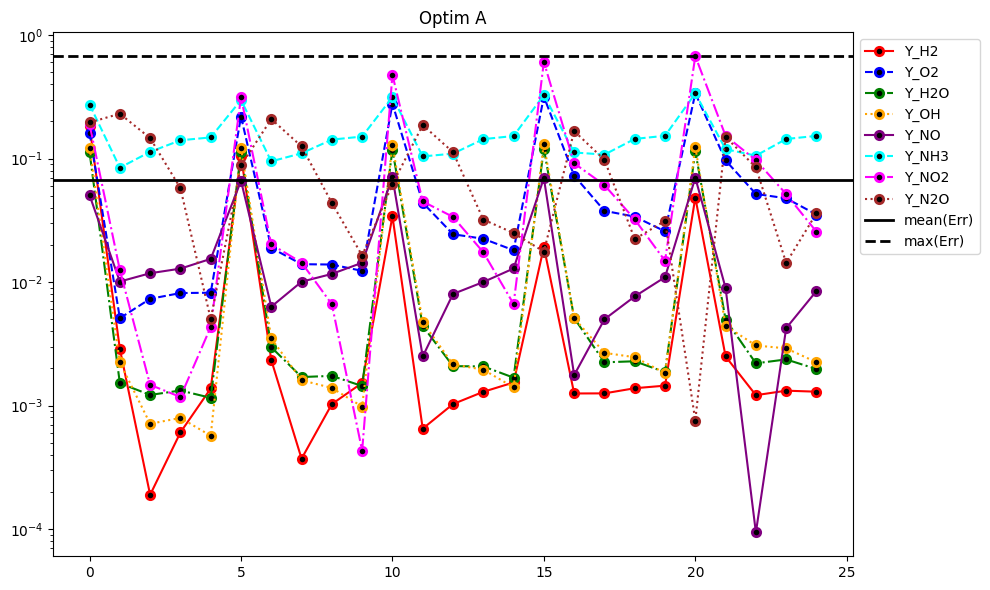

In [26]:

plt.figure(figsize=(10, 6))

# Define a list of line styles and markers to differentiate the curves
line_styles = ['-', '--', '-.', ':']  # Different line styles
for i in range(len(Brookesia)):
    plt.plot(np.array(Err_s_red_A)[:, i], label=f"{Brookesia[i]}", 
             linestyle=line_styles[i % len(line_styles)],  # Use different line styles
             color=colors[i],                            # Use distinct colors
             marker='o', markerfacecolor='black', markeredgewidth=2)  # Add markers
plt.axhline(y=np.mean(Err_s_red_A), color='black', linestyle='-', linewidth=2, label='mean(Err)')
plt.axhline(y=np.max(Err_s_red_A), color='black', linestyle='--', linewidth=2, label='max(Err)')
plt.yscale("log")

# Add the legend outside the figure
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Optim A")
plt.tight_layout()  # Ensure the plot doesn't cut off anything
plt.show()


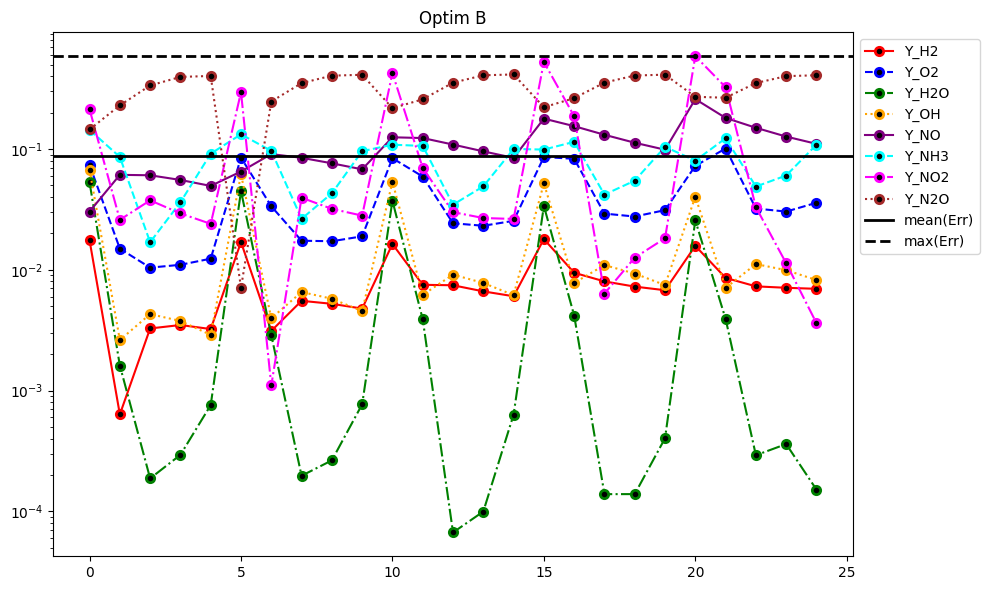

In [27]:


plt.figure(figsize=(10, 6))

# Define a list of line styles and markers to differentiate the curves
line_styles = ['-', '--', '-.', ':']  # Different line styles
for i in range(len(Brookesia)):
    plt.plot(np.array(Err_s_red_B)[:, i], label=f"{Brookesia[i]}", 
             linestyle=line_styles[i % len(line_styles)],  # Use different line styles
             color=colors[i],                            # Use distinct colors
             marker='o', markerfacecolor='black', markeredgewidth=2)  # Add markers
plt.axhline(y=np.mean(Err_s_red_B), color='black', linestyle='-', linewidth=2, label='mean(Err)')
plt.axhline(y=np.max(Err_s_red_B), color='black', linestyle='--', linewidth=2, label='max(Err)')
plt.yscale("log")

# Add the legend outside the figure
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Optim B")
plt.tight_layout()  # Ensure the plot doesn't cut off anything
plt.show()

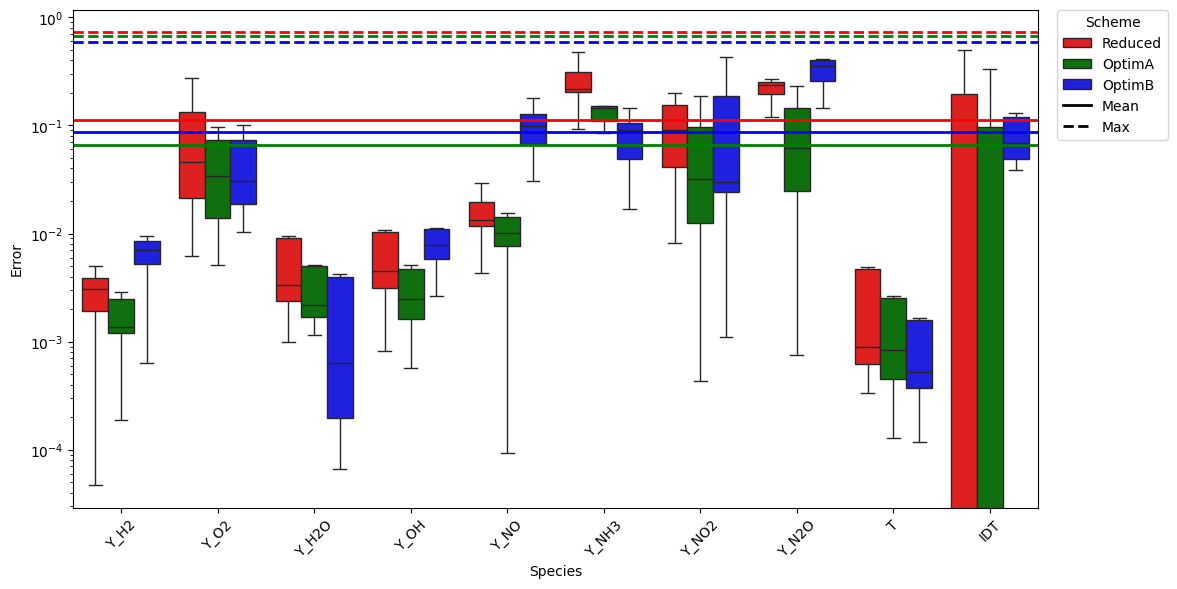

In [28]:

# --- Erreurs par espèce ---
df_red = pd.DataFrame(Err_s_red, columns=Brookesia)
df_red["Version"] = "Reduced"

df_red_A = pd.DataFrame(Err_s_red_A, columns=Brookesia)
df_red_A["Version"] = "OptimA"

df_red_B = pd.DataFrame(Err_s_red_B, columns=Brookesia)
df_red_B["Version"] = "OptimB"

# --- Ajout des erreurs T et IDT comme colonnes ---
df_red["T"] = Err_T_red
df_red["IDT"] = Err_IDT_red

df_red_A["T"] = Err_T_red_A
df_red_A["IDT"] = Err_IDT_red_A

df_red_B["T"] = Err_T_red_B
df_red_B["IDT"] = Err_IDT_red_B

# --- Combine et passe en format long ---
df_all = pd.concat([df_red, df_red_A, df_red_B], ignore_index=True)
df_melted = df_all.melt(id_vars="Version", var_name="Species", value_name="Error")

# --- Tracé ---
palette = {"Reduced": "red", "OptimA": "green", "OptimB": "blue"}
plt.figure(figsize=(14, 6))
sns.boxplot(x="Species", y="Error", hue="Version", data=df_melted, palette=palette, showfliers=False)

# Lignes moyennes et max
for version, color, err_s in zip(
    ["Reduced", "OptimA", "OptimB"],
    ["red", "green", "blue"],
    [Err_s_red, Err_s_red_A, Err_s_red_B]
):
    plt.axhline(np.mean(err_s), linestyle='-', color=color, linewidth=2)
    plt.axhline(np.max(err_s), linestyle='--', color=color, linewidth=2)

# Légende personnalisée
handles, labels = plt.gca().get_legend_handles_labels()
custom_lines = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Mean'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='Max')
]
handles += custom_lines
plt.legend(handles=handles, title="Scheme", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

# Mise en page
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Réduit l'espace utilisé pour laisser la légende à droite
plt.savefig("BROOKESIA.png")

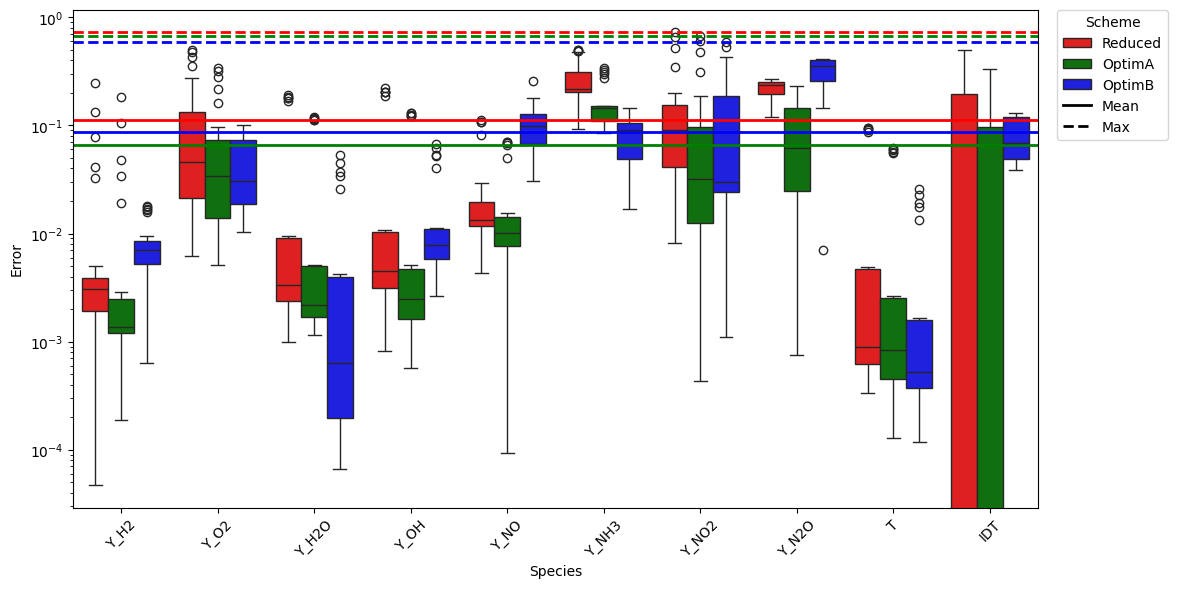

In [29]:

# --- Erreurs par espèce ---
df_red = pd.DataFrame(Err_s_red, columns=Brookesia)
df_red["Version"] = "Reduced"

df_red_A = pd.DataFrame(Err_s_red_A, columns=Brookesia)
df_red_A["Version"] = "OptimA"

df_red_B = pd.DataFrame(Err_s_red_B, columns=Brookesia)
df_red_B["Version"] = "OptimB"

# --- Ajout des erreurs T et IDT comme colonnes ---
df_red["T"] = Err_T_red
df_red["IDT"] = Err_IDT_red

df_red_A["T"] = Err_T_red_A
df_red_A["IDT"] = Err_IDT_red_A

df_red_B["T"] = Err_T_red_B
df_red_B["IDT"] = Err_IDT_red_B

# --- Combine et passe en format long ---
df_all = pd.concat([df_red, df_red_A, df_red_B], ignore_index=True)
df_melted = df_all.melt(id_vars="Version", var_name="Species", value_name="Error")

# --- Tracé ---
palette = {"Reduced": "red", "OptimA": "green", "OptimB": "blue"}
plt.figure(figsize=(14, 6))
sns.boxplot(x="Species", y="Error", hue="Version", data=df_melted, palette=palette, showfliers=True)

# Lignes moyennes et max
for version, color, err_s in zip(
    ["Reduced", "OptimA", "OptimB"],
    ["red", "green", "blue"],
    [Err_s_red, Err_s_red_A, Err_s_red_B]
):
    plt.axhline(np.mean(err_s), linestyle='-', color=color, linewidth=2)
    plt.axhline(np.max(err_s), linestyle='--', color=color, linewidth=2)

# Légende personnalisée
handles, labels = plt.gca().get_legend_handles_labels()
custom_lines = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Mean'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='Max')
]
handles += custom_lines
plt.legend(handles=handles, title="Scheme", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

# Mise en page
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Réduit l'espace utilisé pour laisser la légende à droite
plt.savefig("BROOKESIA_showfliers.png")

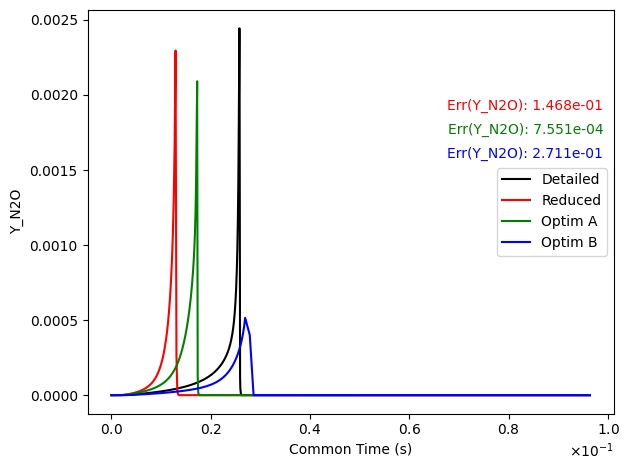

In [37]:
species = "Y_N2O"

selected_case = 20

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]
plt.figure()

# Tracé des courbes
plt.plot(loc_data_d["common_grid"], loc_data_d[species], 'k', label="Detailed")
plt.plot(loc_data_d["common_grid"], loc_data_r[species], 'r', label="Reduced")
plt.plot(loc_data_d["common_grid"], loc_data_o[species], 'g', label="Optim A")
plt.plot(loc_data_d["common_grid"], loc_data_ob[species], 'b', label="Optim B")

# # Limites, légendes et axes
# plt.xlim([0, 0.0005])
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = Err_s_red[selected_case][Brookesia.index(species)]
val_o = Err_s_red_A[selected_case][Brookesia.index(species)]
val_ob = Err_s_red_B[selected_case][Brookesia.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"Err({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"Err({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"Err({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"BROOKESIA_{species}.png")


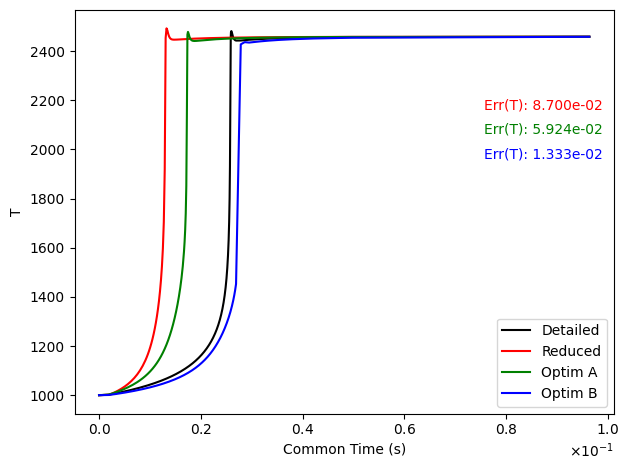

In [35]:
species = "T"


selected_case = 20

loc_data_d = data_d.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_r =data_r.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_o =data_o.iloc[selected_case*lenght:selected_case*lenght+lenght]
loc_data_ob = data_ob.iloc[selected_case*lenght:selected_case*lenght+lenght]

plt.figure()

# Tracé des courbes
plt.plot(loc_data_d["common_grid"], loc_data_d[species], 'k', label="Detailed")
plt.plot(loc_data_d["common_grid"], loc_data_r[species], 'r', label="Reduced")
plt.plot(loc_data_d["common_grid"], loc_data_o[species], 'g', label="Optim A")
plt.plot(loc_data_d["common_grid"], loc_data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
# plt.xlim([0, 0.0005])
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"T")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = Err_T_red[selected_case]
val_o = Err_T_red_A[selected_case]
val_ob = Err_T_red_B[selected_case]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"Err({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"Err({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"Err({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"BROOKESIA_Temperature.png")


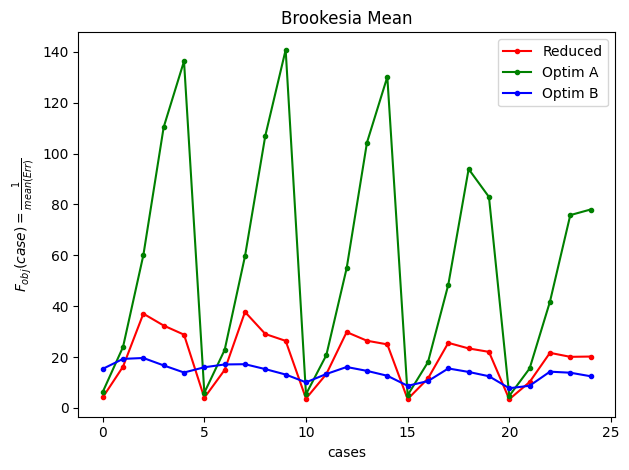

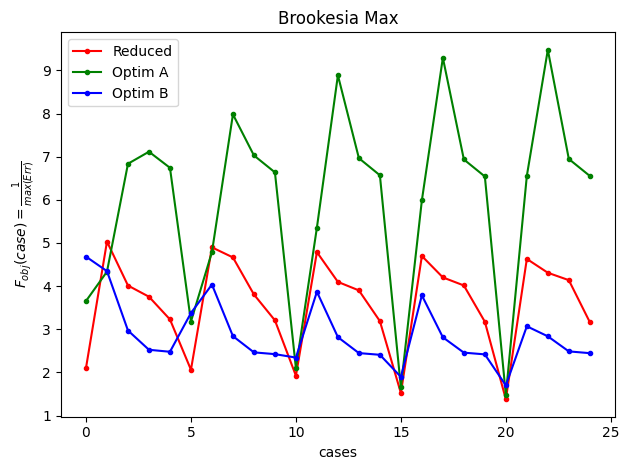

In [32]:
Tot_R = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_A = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_B = pd.DataFrame(0.0, index=range(case), columns=Brookesia+["T"] +["IDT"])
Tot_R[Brookesia] =Err_s_red
Tot_A[Brookesia] =Err_s_red_A
Tot_B[Brookesia] =Err_s_red_B

Tot_R["T"] =Err_T_red
Tot_A["T"]=Err_T_red_A
Tot_B["T"]=Err_T_red_B

Tot_R["IDT"] =Err_IDT_red
Tot_A["IDT"]=Err_IDT_red_A
Tot_B["IDT"]=Err_IDT_red_B

plt.figure()
plt.plot(1/Tot_R.mean(axis=1),"r.-",label="Reduced")
plt.plot(1/Tot_A.mean(axis=1),"g.-",label="Optim A")
plt.plot(1/Tot_B.mean(axis=1),"b.-",label="Optim B")
plt.ylabel(r"$F_{obj}(case) = \frac{1}{mean(Err)}$")
plt.xlabel("cases")
# plt.yscale("log")
plt.legend()
plt.title("Brookesia Mean")
plt.tight_layout()
plt.savefig("BROOKESIA_Err_fit_mean_case.png")

plt.figure()
plt.plot(1/Tot_R.max(axis=1),"r.-",label="Reduced")
plt.plot(1/Tot_A.max(axis=1),"g.-",label="Optim A")
plt.plot(1/Tot_B.max(axis=1),"b.-",label="Optim B")
plt.ylabel(r"$F_{obj}(case) = \frac{1}{max(Err)}$")
plt.xlabel("cases")
# plt.yscale("log")
plt.legend()
plt.title("Brookesia Max")
plt.tight_layout()
plt.savefig("BROOKESIA_Err_fit_max_case.png")